# Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Définition des fonctions

In [2]:
def h(omega,x):
    """
    Hypothesis function : tries to approximate y using x and omega
    
    omega : matrix(n+1,1) coefficients
    x : matrix(n+1,1) features
    n : int number of features
    """
    return np.dot(x,omega)

def J(omega,x,y,m,n):
    """
    Cost function : calculates the gap between the approximation and y
    
    omega : matrix(n+1,1) coefficients
    x : matrix(n+1,1) features
    y : matrix(m,1) outputs
    m : int number of samples
    n : int number of features
    """
    return 

def omega_next(omega,x,y,m,n,alpha):
    """
    Calculates the next coefficient of omega
    
    omega : matrix(n+1,1) coefficients
    x : matrix(n+1,1) features
    y : matrix(m,1) outputs
    m : int number of samples
    n : int number of features
    alpha : real number precision step of derivative
    """
    return omega - (alpha/m) * np.transpose(np.dot(np.transpose(h(omega,x)-y),x))

def gradient_descent(omega,x,y,m,n,iterations=1000,alpha=0.03,delta=0.01):
    """
    Gradient descent
    
    omega : matrix(n+1,1) coefficients
    x : matrix(n+1,1) features
    y : matrix(m,1) outputs
    m : int number of samples
    n : int number of features
    iterations : int number of max iterations (defaut 1000)
    alpha : real number precision step of derivative
    delta : real number derivative value min
    
    returns (J_history)
    """
    #list of cost values
    J_history = [J(omega,x,y,m,n)]
    
    #iterations of gradient descent
    for i in range(iterations):
        omega = omega_next(omega,x,y,m,n,alpha)
        J_history.append(J(omega,x,y,m,n))
        
        if abs(J_history[-2]-J_history[-1]) < delta:
            return (np.array(J_history).reshape(len(J_history)),omega)
            
    return (np.array(J_history).reshape(len(J_history)),omega)

In [3]:
def normalize(column):
    return (column - np.mean(column))/np.std(column)

In [5]:
def MAE():
    """
    Mean Absolute Error
    """

def RMSE(y_test,y_predict):
    """
    Root Mean Squared Error
    
    y_test : matrix(m,1) outputs
    y_predict : matrix(m,1) outputs
    m : int number of samples
    """
    return np.dot(np.transpose(np.absolute(y_test-y_predict)),np.absolute(y_test-y_predict))


# Ouverture du fichier

In [6]:
df = pd.read_excel(open('Folds5x2_pp.xlsx', 'rb'),sheet_name='Sheet1')

# Création des matrices normalisées

In [7]:
df2 = pd.read_excel(open('Folds5x2_pp.xlsx', 'rb'),sheet_name='Sheet1')
x = np.transpose(np.array([np.ones(len(df)),normalize(df['AT']),normalize(df['V']),normalize(df['AP']),normalize(df['RH'])]))
y = np.array(df['PE']).reshape((len(df),1))
m,n = x.shape
omega = np.ones((n,1))

[[463.26]
 [444.37]
 [488.56]
 ...
 [429.57]
 [435.74]
 [453.28]]


# Séparation des sets de train et de test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True)

# Application du gradient descendant

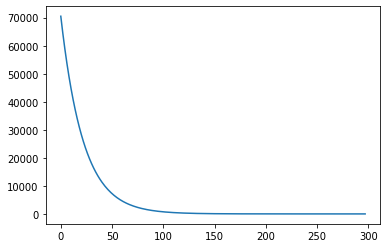

[[453.89800887]
 [-10.36827875]
 [ -6.15496728]
 [  1.2187954 ]
 [ -0.83806304]]


In [7]:
J_history, omega_final = gradient_descent(omega,X_train,y_train,m,n)
plt.plot(J_history[2:])
plt.show()
print(omega_final)

In [8]:
y_predict1 = np.dot(np.array(X_test),np.array(omega_final))
print(mean_squared_error(y_test, y_predict1))

23.370533758020418


# Comparaison à Scikit

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict2 = model.predict(X_test)
print(mean_squared_error(y_test, y_predict2))

19.666105376146202


# Application à tout le fichier

In [10]:
"""for i in range(5):
    df = pd.read_excel(open('Folds5x2_pp.xlsx', 'rb'),sheet_name='Sheet'+str(i+1))
    x = np.transpose(np.array([np.ones(len(df)),normalize(df['AT']),normalize(df['V']),normalize(df['AP']),normalize(df['RH'])]))
    y = np.array(df['PE']).reshape((len(df),1))
    m,n = x.shape
    omega = np.ones((n,1))
    J_history, omega_final = gradient_descent(omega,x,y,m,n)
    plt.plot(J_history[2:], label=str(i+1))
plt.legend(loc='best')
plt.show()"""

"for i in range(5):\n    df = pd.read_excel(open('Folds5x2_pp.xlsx', 'rb'),sheet_name='Sheet'+str(i+1))\n    x = np.transpose(np.array([np.ones(len(df)),normalize(df['AT']),normalize(df['V']),normalize(df['AP']),normalize(df['RH'])]))\n    y = np.array(df['PE']).reshape((len(df),1))\n    m,n = x.shape\n    omega = np.ones((n,1))\n    J_history, omega_final = gradient_descent(omega,x,y,m,n)\n    plt.plot(J_history[2:], label=str(i+1))\nplt.legend(loc='best')\nplt.show()"